# Week 14
### What Is an LCD1602?
The LCD1602 — also called 1602A — is a character LCD module capable of displaying 16 characters per line across 2 lines. It is one of the most widely used displays in electronics, robotics, and IoT projects, LCD1602. 

### Why It’s Called LCD1602?
* 16 → number of characters per row
* 02 → number of rows
So "1602" = 16 columns × 2 rows

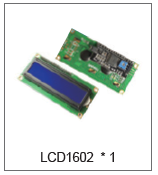

### The Display Panel (Character Grid)

The LCD screen contains a 5×8 dot matrix for each character.
This means each letter or symbol is drawn using 5 horizontal pixels × 8 vertical pixels.

**Examples of what fits:**
* Text (A–Z)
* Numbers (0–9)
* Punctuation
* Arrows, symbols, simple icons
**It cannot show images.**

## What is I²C?
**`I²C` (pronounced “I-squared-C”)** is a two-wire communication protocol used by microcontrollers (like Raspberry Pi Pico, Arduino, ESP32) to talk to sensors, displays, and other devices.

It allows multiple devices to communicate over just two wires:

* SDA → Serial Data
* SCL → Serial Clock

### I²C LCD1602 (4 pins, recommended)

Uses an attached I²C backpack module (PCF8574 chip).

**Pins:**
* GND
* VCC
* SDA (data line)
* SCL (clock line)

This reduces wiring from **16 pins → 4 pins**
This is much easier for Raspberry Pi Pico, ESP32, and Arduino.

### How I²C LCD1602 Communicates

I²C is a digital communication protocol using two wires:

* SDA → sends/receives data
* SCL → clock timing

Each I²C device has an address, usually:
* 0x27
* 0x3F

Your code must use the correct address.

The microcontroller sends:

Commands → clear screen, move cursor

Characters → letters, numbers, symbols

The LCD processes them and updates the display.

### Example code

```python
from machine import Pin,I2C
from lcd_api import LcdApi
from i2c_lcd import I2cLcd

# Setup I2C for the LCD
i2c = I2C(0, scl=Pin(1), sda=Pin(0), freq=400000)
I2C_ADDR = 0x27
lcd = I2cLcd(i2c, I2C_ADDR, 2, 16) 
lcd.clear()
lcd.putstr("hi \n")
lcd.putstr("Mohammed")
```

## Task 1 - Smart Welcome Display for the IT Lab

**Scenario:**

Your school’s IT Lab wants a small Smart Welcome Display near the classroom door.
When students arrive each morning, they can press a button to cycle through different welcome messages shown on the LCD1602 screen.

The idea is to create something fun and interactive that greets visitors and helps students learn how buttons, LEDs, and LCD displays work together in an IoT system.

**The system must:**
* Show a greeting on the LCD.
* Change the greeting every time someone presses the button.
* Flash an LED when the final message is reached.
* Loop back to the first greeting after the last one.

#### Task Description 
**Greeting Menu – Button-Controlled Interface**

You will build a Greeting Menu System that displays different welcome messages on an LCD screen.

Your push-button will act as a Next selector.

Every press will move to the next greeting in the list.

**Messages to display (in order):**
* HELLO!
* WELCOME!
* GOOD MORNING!
* HAVE A GREAT DAY :)

#### LED Behaviour:

* When the final message (HAVE A GREAT DAY :)) is displayed,
    → The LED must flash 3 times.

* Then the menu loops back to the first message.

#### What You Need to Do:

1. Connect the LED, button, and LCD1602.
2. Write MicroPython code that:
    * Stores the greetings in a list
    * Detects button presses
    * Changes the greeting index
    * Displays the current greeting on the LCD
    * Flashes the LED on the last message

3. Test the system and demonstrate the greeting cycle working smoothly.

#### Hardware Requirement 
* Breadboard
* Raspberry Pi Pico
* LCD1602 screen
* Button
* LED
* Jumper wire

## Task 2 - Classroom Mini Weather Station

**Scenario:**

Your school wants a small Weather Station Display for the classroom.

**Teachers want a quick way to see:**

* Current temperature (°C)
* Current humidity (%)
* A simple comfort message (“OK”, “HOT”, “COLD”, “HUMID”, etc.)

The device will sit on the teacher’s desk and update automatically every few seconds.

**This teaches you:**

* Reading sensors
* Displaying formatted text on LCD
* If/else logic for status messages
* Real-time IoT-style monitoring

#### Task Description 
**Weather Station Display**

Students must read data from the DHT11 sensor and show it on the LCD1602 every 2–3 seconds.

**LCD Output Format**

Line 1:

`TEMP: 24°C HUM:45%`

Line 2 (status message):

<table style="margin-left: 0; border-collapse: collapse; width: 50%; font-size: 14px;">
    <tr style="background-color: #13BDE3;">
       <th style="text-align: left;"><b>Condition</b></th>
        <th style="text-align: left;"><b>Message</b></th>
    </tr>
    <tr>
        <td>Temp < 18°C</td>
        <td>COLD  </td>
    </tr>
    <tr>
        <td>Temp 18–28°C</td>
        <td>COMFORT</td>
    </tr>
    <tr>
        <td>Temp > 28°C</td>
        <td> HOT! </td>
    </tr>
    <tr>
        <td>Humidity > 70%</td>
        <td>HUMID!</td>
    </tr>
</table>

#### Hardware Requirement
* Breadboard
* Raspberry Pi Pico
* LCD1602 screen
* DHT11
* Jumper wire

## Task 3 - Smart Parking Assistant for the School Workshop
**Scenario:**

Your school’s automotive and IT departments have teamed up to create a Smart Parking Assistant System that helps students safely park model vehicles inside the workshop.

Every week, students drive remote-controlled or robotic cars into small parking bays for storage. The problem?
Sometimes students park too close to the wall or equipment, which can cause damage.

To solve this, the class has been asked to design a digital distance-monitoring device, similar to the real reversing sensors found in modern cars.

Your task is to build a Parking Assistant Display that:

**Measures distance using an ultrasonic sensor**

The device will constantly check how close an object (car, hand, box, etc.) is to the sensor.

**Displays real-time distance on the LCD1602**

The first line shows:

**`DIST: 32.5 cm`**

**Shows a visual “proximity bar”**

The second line displays a bar graph that fills up as the object gets closer:

**`[####------]`**

**Alerts the user with sound**

The buzzer should beep:
* No sound when the object is far
* Slow beeps when medium distance
* Rapid beeps when dangerously close

**Warns visually**

* The LED should:
* Stay OFF when far
* Turn ON when medium distance
* Flash quickly when too close

#### Hardware Requirement 
* Breadboard
* Raspberry Pi Pico
* LCD1602 screen
* Ultrasonic sensor
* Buzzer
* LED
* Jumper wire


## Task 4 - Smart Automatic Parking Gate System

**Scenario:**

Your school is upgrading the entrance to its model car workshop by installing a Smart Automatic Parking Gate System—similar to the boom gates used in real car parks.

Students often drive small robotic vehicles into the workshop, but manually opening the gate slows traffic and causes congestion. To solve this, you have been asked to design an automated gate that:

* Detects an approaching car using an ultrasonic sensor
* Displays distance and gate status on the LCD1602
* Lifts a servo-powered barrier automatically
* Closes the gate once the car has passed

This system simulates real-world applications such as:

* Shopping-centre parking barriers
* Toll gates
* Secure facility entry systems
* Industrial automation

By completing this project, you will learn how sensors, actuators, and display systems work together to form a complete embedded solution.

#### How the System Works

The system uses three major components:

**Ultrasonic Sensor (HC-SR04)**

* Reads the distance to an approaching vehicle.
    * If the car gets closer than 40 cm, it triggers the gate to open.
    * If the car moves farther than 80 cm, the gate automatically closes.

This prevents the gate from opening and closing repeatedly due to noise—this is called hysteresis, a common technique in engineering.

**Servo Motor**

Controls a physical barrier arm.
* 0° → Gate closed
* 90° → Gate open

The servo uses PWM control to move smoothly and accurately.

**CD1602 Display**

Shows real-time system information, such as:

Line 1:

**`DIST: 32.4 cm`**

Line 2:

**`STATUS: OPEN`**

or

**`STATUS: CLOSED`**

This allows users to see exactly what the system is doing and why the gate is opening or closing.

When a model car approaches the workshop entrance:
1. The ultrasonic sensor detects the car.
2. The LCD displays the car’s distance.
3. Once the car is within 40 cm, the gate automatically lifts.
4. The LCD updates to show “STATUS: OPEN”.
5. After the car passes and the distance increases beyond 80 cm,
the gate lowers itself, and the LCD shows “STATUS: CLOSED”.

This creates a hands-free, intelligent gate system, just like real automated parking facilities.

#### Hardware Requirement 
* Breadboard
* Raspberry Pi Pico
* LCD1602 screen
* Ultrasonic sensor
* Servo Motor
* Jumper wire
